In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics as sta 
import scipy.stats as sp
import statsmodels.stats.api as sms
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
!pip install bioinfokit
from bioinfokit.analys import stat

In [2]:
#Import the data set
url = 'https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [4]:
df.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [6]:
df.isna().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [7]:
#Check the categories
for col in df:
  print(df[col].unique())

[2020 2021]
['July-Sept' 'Oct-Dec' 'Jan-Mar' 'Apr-June']
[1005907 1014562 1029922 ... 1021067 1008998 1033395]
[6017884. 6056669. 6057065. ... 6064396. 6008662. 6032145.]
[326622 327535 330778 ... 324057 331870 310583]
['White' 'Unknown or Legacy' 'Black' 'South Asian' 'Indigenous'
 'Middle-Eastern' 'Latino' 'East/Southeast Asian' nan]
['M' 'F' 'U']
['Aged 35 to 44 years' 'Aged 25 to 34 years' 'Aged 45 to 54 years'
 'Aged 55 to 64 years' 'Aged 18 to 24 years' 'Aged 65 and older'
 'Aged 65 years and older' nan 'Aged 17 years and younger'
 'Aged 17 years and under']
['Not a youth' 'Youth (aged 17 and younger)'
 'Youth (aged 17 years and under)']
['54' 'XX' '42' '52' '14' '51' '53' '31' '11' '12' '13' '41' '22' '55'
 '43' '23' '33' '32']
[0 1]
[1 0]
['Assault & Other crimes against persons' 'Harassment/Threatening'
 'FTA/FTC/Compliance Check/Parollee' 'Assault' 'Robbery/Theft'
 'Sexual Related Crime' 'Mischief & Fraud' 'Warrant'
 'Police Category - Administrative' 'Robbery & Theft'
 'FTA/

In [8]:
#check Sex column
df["Sex"].value_counts()

M    52650
F    12617
U        9
Name: Sex, dtype: int64

In [9]:
#remove rows without arrested ID because we
df = df[df['ArrestID'].notnull()]

In [10]:
# remove any rows has a value of 'U' in Sex
df.drop(df[df['Sex'] == 'U'].index, inplace = True)
df['Sex']. value_counts()

M    52256
F    12542
Name: Sex, dtype: int64

In [11]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [12]:
df['Youth_at_arrest__under_18_years'].unique()

array(['Not a youth', 'Youth (aged 17 and younger)',
       'Youth (aged 17 years and under)'], dtype=object)

In [13]:
df['Youth_at_arrest__under_18_years'].value_counts()

Not a youth                        61775
Youth (aged 17 and younger)         1663
Youth (aged 17 years and under)     1360
Name: Youth_at_arrest__under_18_years, dtype: int64

In [14]:
# replaces the value 'Youth (aged 17 and younger)' into 'Youth'
df['Youth_at_arrest__under_18_years'] = df['Youth_at_arrest__under_18_years'].replace({'Youth (aged 17 and younger)':'Youth',
                                                                                       'Youth (aged 17 years and under)':'Youth'})

In [15]:
df['Youth_at_arrest__under_18_years'].value_counts()

Not a youth    61775
Youth           3023
Name: Youth_at_arrest__under_18_years, dtype: int64

In [16]:
# rename the variable
df = df.rename(columns={"Youth_at_arrest__under_18_years": "Youth"})

In [17]:
# Count the number of arrests by each person, and create the new varaible "Number_Arrests"
number_arrests = df.groupby("PersonID").size()
df["Number_Arrests"] = df["PersonID"].map(number_arrests)
print(df["Number_Arrests"].head(10))

0    3
1    3
2    3
3    3
4    3
5    3
6    7
7    7
8    7
9    7
Name: Number_Arrests, dtype: int64


In [18]:
# Count the number of strip search by each person, and create the new varaible "Number_StripSearches"
number_strip_search = df.groupby("PersonID")["StripSearch"].sum()
df["Number_StripSearches"] = df["PersonID"].map(number_strip_search)
print(df["Number_StripSearches"].head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    1
9    1
Name: Number_StripSearches, dtype: int64


In [19]:
df["StripSearch_Ratio"] = df["Number_StripSearches"] / df["Number_Arrests"]
print(df["StripSearch_Ratio"].head(10))

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.142857
7    0.142857
8    0.142857
9    0.142857
Name: StripSearch_Ratio, dtype: float64


In [20]:
# Drop duplicate "PersonID"
df = df.drop_duplicates(subset="PersonID", keep="first")
print(df.head(10))

    Arrest_Year Arrest_Month  EventID   ArrestID  PersonID Perceived_Race Sex  \
0          2020    July-Sept  1005907  6017884.0    326622          White   M   
3          2021      Jan-Mar  1052190  6029059.0    327535          Black   M   
6          2021      Jan-Mar  1035445  6053833.0    330778          Black   M   
13         2021      Oct-Dec  1022468  6047871.0    328630     Indigenous   M   
14         2020     Apr-June  1045382  6057058.0    312724          Black   M   
22         2020      Jan-Mar  1035486  6064779.0    324224          Black   M   
23         2021      Oct-Dec  1024066  6039028.0    302537          White   M   
24         2020      Jan-Mar  1041111  6046989.0    305813          Black   M   
25         2020      Oct-Dec  1001752  6051933.0    323720          White   M   
26         2020    July-Sept  1050474  6025215.0    304162          White   M   

   Age_group__at_arrest_        Youth ArrestLocDiv  ...  \
0    Aged 35 to 44 years  Not a youth           5

## RQ1

In [21]:
#check the unique values in the df_q1 dataframe
df_q1 = df
for col in df_q1:
  print(df_q1[col].unique())

[2020 2021]
['July-Sept' 'Jan-Mar' 'Oct-Dec' 'Apr-June']
[1005907 1052190 1035445 ... 1021067 1008998 1033395]
[6017884. 6029059. 6053833. ... 6064396. 6008662. 6032145.]
[326622 327535 330778 ... 324057 331870 310583]
['White' 'Black' 'Indigenous' 'South Asian' 'Unknown or Legacy'
 'Middle-Eastern' 'East/Southeast Asian' 'Latino' nan]
['M' 'F']
['Aged 35 to 44 years' 'Aged 25 to 34 years' 'Aged 45 to 54 years'
 'Aged 55 to 64 years' 'Aged 18 to 24 years' 'Aged 65 and older'
 'Aged 65 years and older' nan 'Aged 17 years and younger'
 'Aged 17 years and under']
['Not a youth' 'Youth']
['54' 'XX' '52' '53' '31' '42' '51' '11' '12' '13' '41' '22' '43' '23'
 '33' '32' '14' '55']
[0 1]
[1 0]
['Assault & Other crimes against persons' 'Harassment/Threatening'
 'Assault' 'Mischief & Fraud' 'FTA/FTC, Compliance Check & Parollee'
 'Drug Related' 'Weapons' 'Vehicle Related (inc. Impaired)'
 'Other Offence' 'Warrant' 'Robbery/Theft' 'Robbery & Theft'
 'Break and Enter' 'Break & Enter' 'Weapons & H

In [22]:
df_agg_q1 = df_q1.groupby(['Youth', 'Sex']).agg({'Number_Arrests': ['mean', 'std']})
df_agg_q1.columns = df_agg_q1.columns.droplevel()
df_agg_q1 = df_agg_q1.reset_index()
print(df_agg_q1)

         Youth Sex      mean       std
0  Not a youth   F  1.647710  1.926827
1  Not a youth   M  1.772975  2.073717
2        Youth   F  1.433145  1.442205
3        Youth   M  1.575855  1.275474


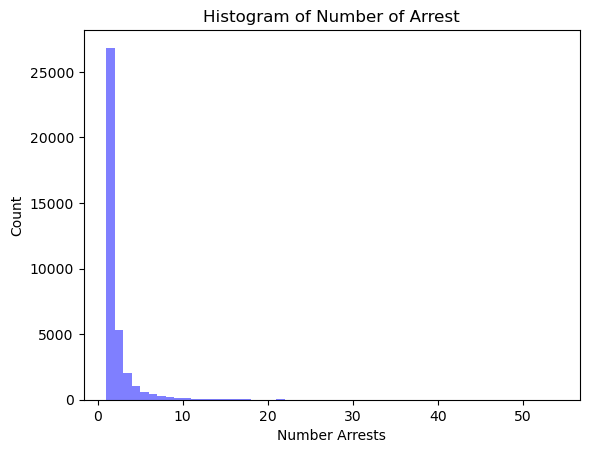

In [23]:
#create histogram of Arrested Times
plt.hist(df['Number_Arrests'], bins=range(1, 55), alpha=0.5, color='Blue')
plt.title('Histogram of Number of Arrest')
plt.xlabel('Number Arrests')
plt.ylabel('Count')
plt.show()

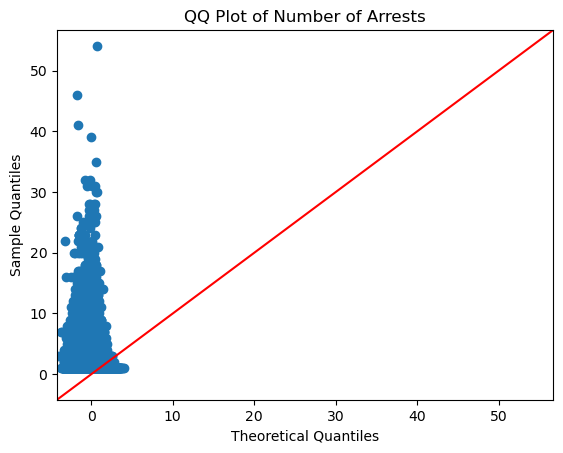

In [24]:
#create qq plots to check the nomality of arrested times 
qq_arrested_df = sm.qqplot(df.loc[:,['Number_Arrests']], line='45')
plt.title('QQ Plot of Number of Arrests')
plt.show()

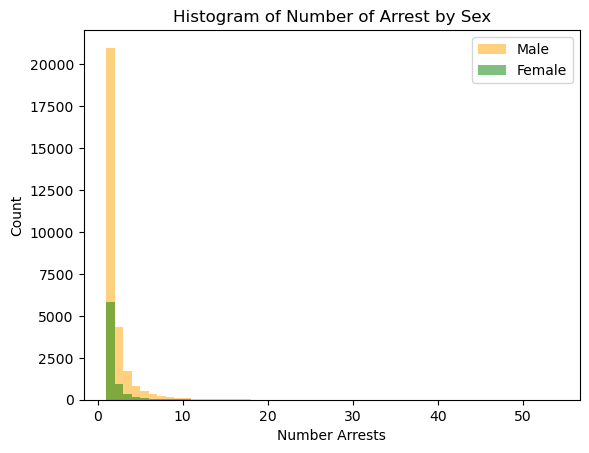

In [25]:
#Create male df and female df
male_df = df_q1[df_q1['Sex'] == 'M']
female_df = df_q1[df_q1['Sex'] == 'F']

#Create histogram with x as arrested times and x is count
plt.hist(male_df['Number_Arrests'], bins=range(1, 55), alpha=0.5, label='Male', color='Orange')
plt.hist(female_df['Number_Arrests'], bins=range(1, 55), alpha=0.5, label='Female', color='Green')
plt.title('Histogram of Number of Arrest by Sex')
plt.legend(['Male','Female'])
plt.xlabel('Number Arrests')
plt.ylabel('Count')
plt.show()

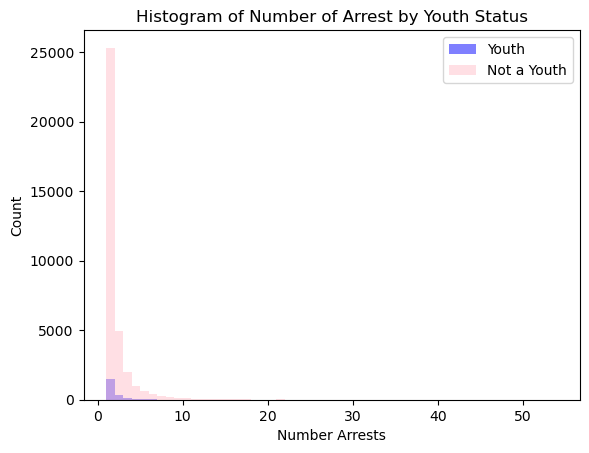

In [26]:
#Create youth df and not a youth df
youth_df = df_q1[df_q1['Youth'] == 'Youth']
not_youth_df = df_q1[df_q1['Youth'] == 'Not a youth']

#Create histogram with x as arrested times and x is count
plt.hist(youth_df['Number_Arrests'], bins=range(1, 55), alpha=0.5, label='Youth', color='Blue')
plt.hist(not_youth_df['Number_Arrests'], bins=range(1, 55), alpha=0.5, label='Not a Youth', color='Pink')
plt.title('Histogram of Number of Arrest by Youth Status')
plt.legend(['Youth','Not a Youth'])
plt.xlabel('Number Arrests')
plt.ylabel('Count')
plt.show()

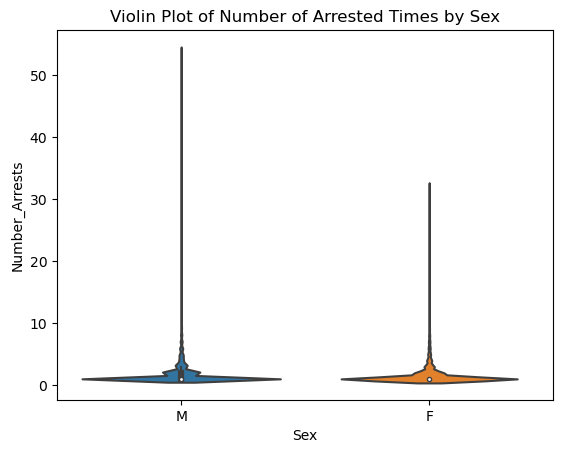

In [27]:
# create a violin plot of Number of Arrested Times by Sex
sns.violinplot(data=df_q1, x='Sex', y='Number_Arrests')
plt.title('Violin Plot of Number of Arrested Times by Sex')
plt.show()

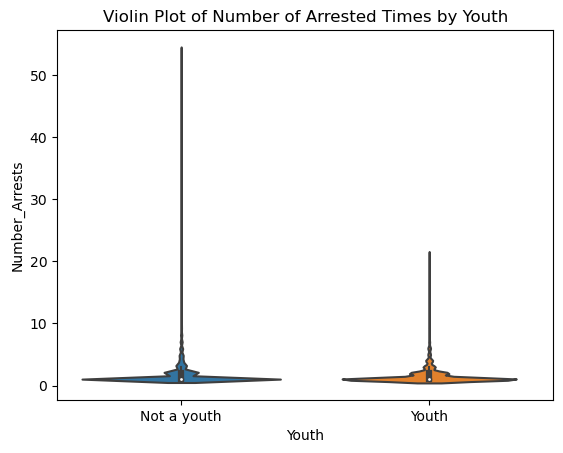

In [28]:
# create a violin plot of Number of Arrested Times by Youth
sns.violinplot(data=df_q1, x='Youth', y='Number_Arrests')
plt.title('Violin Plot of Number of Arrested Times by Youth')
plt.show()

Text(0.5, 1.0, 'Box Plot of Number of Arrest by Sex')

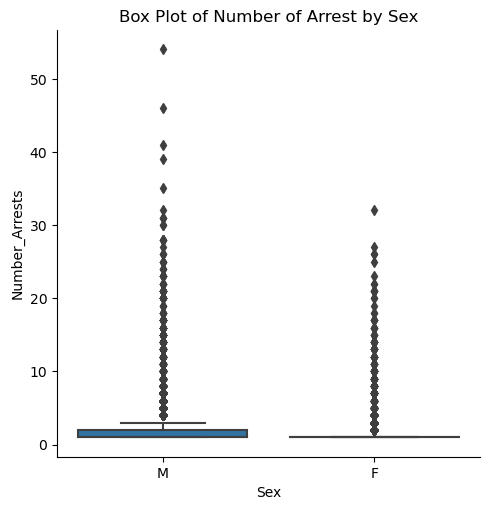

In [29]:
#create box plot of arrested times by sex
sns.catplot(data=df_q1, kind="box", x="Sex", y='Number_Arrests')
plt.title('Box Plot of Number of Arrest by Sex')

Text(0.5, 1.0, 'Box Plot of Number of Arrest by Youth Status')

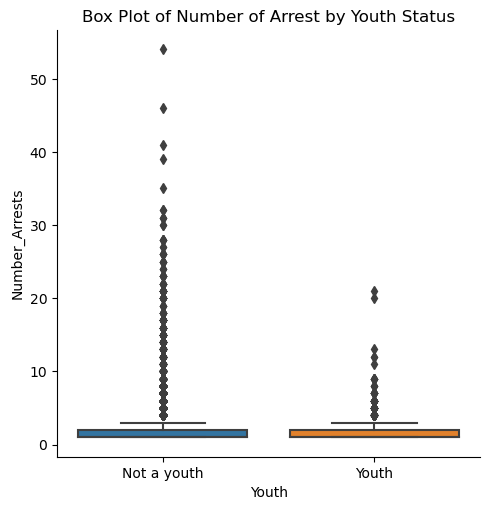

In [30]:
#create box plot of arrested times by youth status at arrested
sns.catplot(data=df_q1, kind="box", x="Youth", y='Number_Arrests')
plt.title('Box Plot of Number of Arrest by Youth Status')

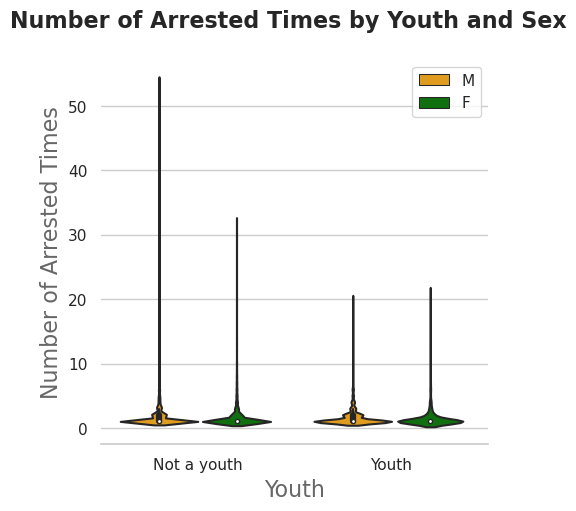

In [31]:
#Violin plot of Number of Arrested times
#Reference: https://app.mode.com/modeanalytics/reports/8f48bee3ee4e/details/notebook
sns.set(style="whitegrid", palette="pastel", color_codes=True)

f, ax = plt.subplots(figsize=(5, 5))

sns.violinplot(x="Youth", y="Number_Arrests", hue="Sex", data=df,
               palette={"M": "Orange", "F": "Green"})
sns.despine(left=True)

f.suptitle('Number of Arrested Times by Youth and Sex', fontsize=16, fontweight='bold')
ax.set_xlabel("Youth",size = 16,alpha=0.7)
ax.set_ylabel("Number of Arrested Times",size = 16,alpha=0.7)
plt.legend(loc='upper right')

In [32]:
#conduct formal statistics test "Shapiro–Wilk test" to check the normality of the dependent variables
#H0: the arrested times are normally distributed
#Ha: the arrested times are not normally distributed
print('Shapiro Result for Male:',(shapiro(male_df.loc[:,['Number_Arrests']])),
      'Shapiro Result for Female:',(shapiro(female_df.loc[:,['Number_Arrests']])),
      'Shapiro Result for Youth when arrested:',(shapiro(youth_df.loc[:,['Number_Arrests']])),
      'Shapiro Result for Not a Youth when arrested:',(shapiro(not_youth_df.loc[:,['Number_Arrests']])))

Shapiro Result for Male: ShapiroResult(statistic=0.40654247999191284, pvalue=0.0) Shapiro Result for Female: ShapiroResult(statistic=0.36695152521133423, pvalue=0.0) Shapiro Result for Youth when arrested: ShapiroResult(statistic=0.4488774538040161, pvalue=0.0) Shapiro Result for Not a Youth when arrested: ShapiroResult(statistic=0.3992472290992737, pvalue=0.0)


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [33]:
#Conduct the Levene's test to check if the variance are the same between male's and female's arrested times
#H0:the variance between the two groups are equal
#H1:the variance between the two groups are not equal
male_at = male_df['Number_Arrests'].values
female_at = female_df['Number_Arrests'].values
stats.levene(male_at, female_at, center='mean')

LeveneResult(statistic=27.124440889266484, pvalue=1.9178140077407385e-07)

In [34]:
#Conduct the Levene's test to check if the variance are the same between Youth's and Not a Youth's arrested times
#H0:the variance between the two groups are equal
#H1:the variance between the two groups are not equal
youth_at = youth_df['Number_Arrests'].values
not_youth_at = not_youth_df['Number_Arrests'].values
stats.levene(youth_at, not_youth_at, center='mean')

LeveneResult(statistic=56.572196642588985, pvalue=5.538663478985548e-14)

In [35]:
#Conduct t-test of the arrested times in the male df and female df
t_stat, p_value = stats.ttest_ind(male_at, female_at, equal_var = False)
print("T-statistic value:", t_stat)  
print("P-Value: ", p_value)

T-statistic value: 5.256299176606183
P-Value:  1.4937541494750537e-07


In [36]:
#calculate mean and standard deviation of groups 
print('Mean arrested times, male, female:',male_at.mean(), female_at.mean())
print('Standard deviation for arrested times, male, female:',male_at.std(), female_at.std())

Mean arrested times, male, female: 1.762678715942811 1.6328552803129075
Standard deviation for arrested times, male, female: 2.0401927502436954 1.8978516801680543


In [37]:
#compute confidence interval 
cm_q1_sex = sms.CompareMeans(sms.DescrStatsW(male_at), sms.DescrStatsW(female_at))
print('Confidence interval for arrested times:',cm_q1_sex.tconfint_diff(usevar='unequal'))

Confidence interval for arrested times: (0.08141035901581462, 0.1782365122439924)


In [38]:
#welch dof
#degrees of freedom code for Welch test 
#code from https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/ (values checked against R output)
def welch_dof(x, y): 
  
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

print('DOF for arrested times by gender:',welch_dof(male_at, female_at))

DOF for arrested times by gender: 12646.192264518066


In [39]:
#Conduct t-test of the arrested times in the youth df and not_youth df
t_stat, p_value = stats.ttest_ind(youth_at, not_youth_at, equal_var = False)
print("T-statistic value:", t_stat)  
print("P-Value: ", p_value)

T-statistic value: -6.726488619431878
P-Value:  2.112907466687021e-11


In [40]:
#calculate mean and standard deviation of groups 
print('Mean arrested times, youth, not a youth:',youth_at.mean(), not_youth_at.mean())
print('Standard deviation for arrested times, youth, not a youth:',youth_at.std(), not_youth_at.std())

Mean arrested times, youth, not a youth: 1.539423076923077 1.7476025648300517
Standard deviation for arrested times, youth, not a youth: 1.3208329444557942 2.0453816287914055


In [41]:
#compute confidence interval 
cm_q1_sex = sms.CompareMeans(sms.DescrStatsW(youth_at), sms.DescrStatsW(not_youth_at))
print('Confidence interval for arrested times:',cm_q1_sex.tconfint_diff(usevar='unequal'))

Confidence interval for arrested times: (-0.2688659673381397, -0.14749300847580968)


In [42]:
#welch dof
print('DOF for arrested times by youth status:',welch_dof(youth_at, not_youth_at))

DOF for arrested times by youth status: 2705.8640376819817


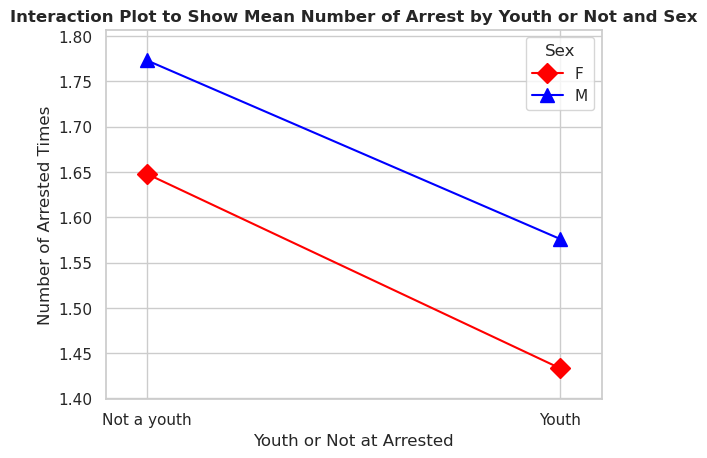

In [43]:
#plot an interaction plot 
#refer to: https://www.statsmodels.org/dev/generated/statsmodels.graphics.factorplots.interaction_plot.html
from statsmodels.graphics.factorplots import interaction_plot
youth_o = df_q1['Youth']
gender_o = df_q1['Sex']

youth_twanova = youth_o.astype(str)
gender_twanova = gender_o.astype(str)
At_twanova = df_q1['Number_Arrests'].values

rq_2_interaction = interaction_plot(youth_twanova, gender_twanova, At_twanova, colors=['red','blue'], markers=['D','^'], ms=10)

plt.ylabel('Number of Arrested Times')
plt.xlabel('Youth or Not at Arrested')
plt.title('Interaction Plot to Show Mean Number of Arrest by Youth or Not and Sex', fontweight='bold')
plt.show()

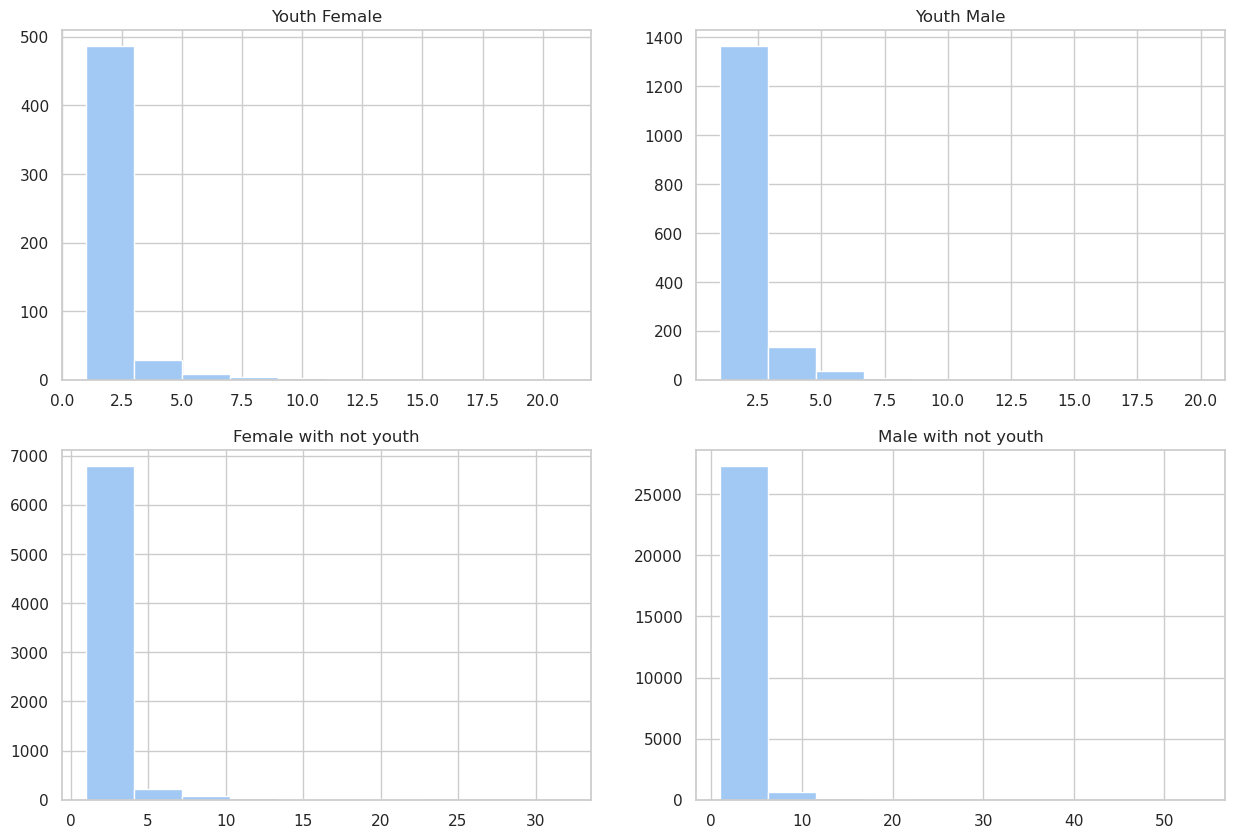

In [44]:
# conduct histograms to check assumption if the variables are normal distribution.
q1_female_youth = df_q1[(df_q1['Sex'] == 'F') & (df_q1['Youth'] == 'Youth')]
q1_male_youth = df_q1[(df_q1['Sex'] == 'M') & (df_q1['Youth'] == 'Youth')]
q1_female_not_youth = df_q1[(df_q1['Sex'] == 'F') & (df_q1['Youth'] == 'Not a youth')]
q1_male_not_youth = df_q1[(df_q1['Sex'] == 'M') & (df_q1['Youth'] == 'Not a youth')]


fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0,0].hist(q1_female_youth['Number_Arrests'], bins=10)
axs[0,0].set_title('Youth Female')
axs[0,1].hist(q1_male_youth['Number_Arrests'], bins=10)
axs[0,1].set_title('Youth Male')
axs[1,0].hist(q1_female_not_youth['Number_Arrests'], bins=10)
axs[1,0].set_title('Female with not youth')
axs[1,1].hist(q1_male_not_youth['Number_Arrests'], bins=10)
axs[1,1].set_title('Male with not youth')
plt.show()

In [45]:
# check assumptions if the variances is homogenous.
# Reference: https://www.reneshbedre.com/blog/anova.html
# H0:the variance between the groups are equal
# H1:the variance between the groups are not equal
res = stat()
res.levene(df=df, res_var='Number_Arrests', xfac_var=['Sex', 'Youth'])
res.levene_summary

,Parameter,Value
0,Test statistics (W),2.8478
1,Degrees of freedom (Df),3.0000
2,p value,0.0362


In [46]:
#Reference:https://towardsdatascience.com/two-way-anova-test-with-python-a112e2396d78
import statsmodels.api as sm
from statsmodels.formula.api import ols

# perform two-way ANOVA
q1_model = ols('Number_Arrests ~ Youth + Sex + Sex:Youth', data=df_q1).fit()
sm.stats.anova_lm(q1_model, typ=2)

,sum_sq,df,F,PR(>F)
Youth,79.685460,1.0,19.697321,9.098808e-06
Sex,97.271912,1.0,24.044487,9.453045e-07
Sex:Youth,0.112533,1.0,0.027817,8.675408e-01
Residual,150986.055279,37322.0,NaN,NaN


Tukey's HSD Test

In [47]:
#perform a Tukey Test
#Reference:https://towardsdatascience.com/anova-tukey-test-in-python-b3082b6e6bda
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_q1['combination'] = df_q1.Sex + " / " + df_q1.Youth

# perform multiple pairwise comparison (Tukey HSD)
q1_post_hoc = pairwise_tukeyhsd(endog=df_q1['Number_Arrests'], groups=df_q1['combination'], alpha=0.05)

print(q1_post_hoc)


         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
F / Not a youth       F / Youth  -0.2146 0.0826  -0.447  0.0179  False
F / Not a youth M / Not a youth   0.1253    0.0  0.0568  0.1938   True
F / Not a youth       M / Youth  -0.0719 0.5792 -0.2167   0.073  False
      F / Youth M / Not a youth   0.3398 0.0007  0.1135  0.5662   True
      F / Youth       M / Youth   0.1427 0.4924 -0.1171  0.4026  False
M / Not a youth       M / Youth  -0.1971  0.001  -0.332 -0.0623   True
----------------------------------------------------------------------


## RQ2

In [48]:
df_agg_q2 = df.groupby(['Youth', 'Sex']).agg({'StripSearch_Ratio': ['mean', 'std']})
df_agg_q2.columns = df_agg_q2.columns.droplevel()
df_agg_q2 = df_agg_q2.reset_index()
print(df_agg_q2)

         Youth Sex      mean       std
0  Not a youth   F  0.069070  0.224466
1  Not a youth   M  0.085735  0.244931
2        Youth   F  0.022896  0.128663
3        Youth   M  0.078086  0.235334


Plots for Sex

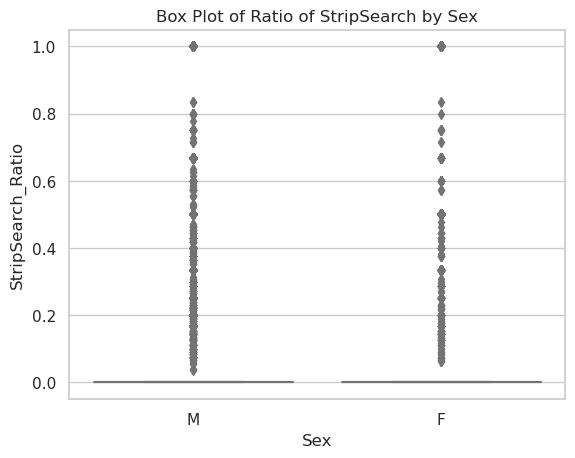

In [49]:
# create a boxplot about the ratio of strip search and arrest by sex
sns.boxplot(x='Sex', y='StripSearch_Ratio', data=df)
plt.title('Box Plot of Ratio of StripSearch by Sex')
plt.show()

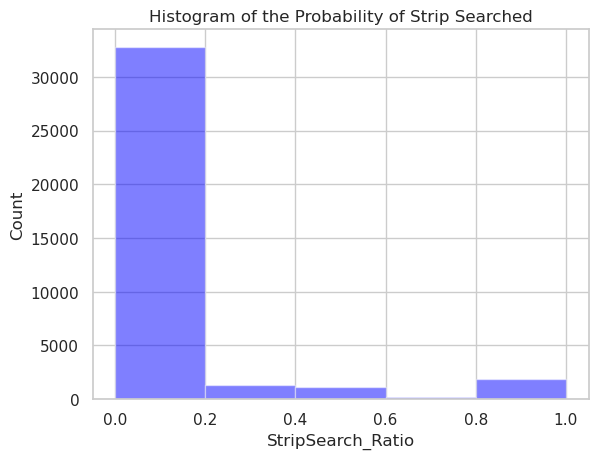

In [50]:
#create histogram of about the ratio of strip search
plt.hist(df['StripSearch_Ratio'], bins=5, alpha=0.5, color='Blue')
plt.title('Histogram of the Probability of Strip Searched')
plt.xlabel('StripSearch_Ratio')
plt.ylabel('Count')
plt.show()

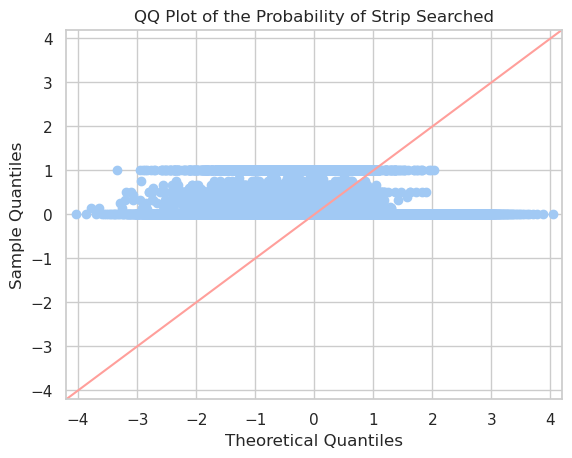

In [51]:
#create qq plot for the ratio of strip search to check the normality
qq_strip_df = sm.qqplot(df.loc[:,['StripSearch_Ratio']], line='45')
plt.title('QQ Plot of the Probability of Strip Searched')
plt.show()

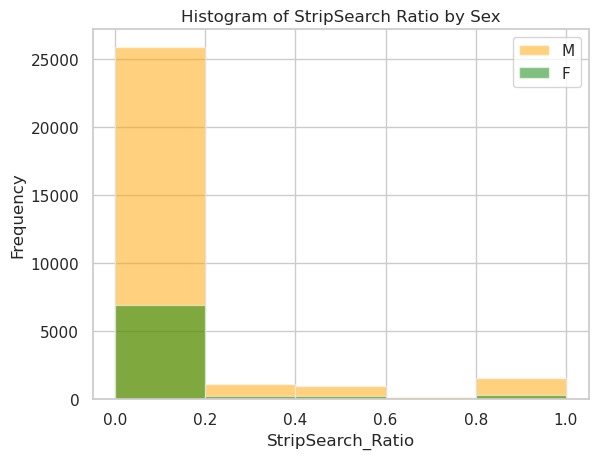

In [52]:
# create a histogram about the ratio of strip search by sex
df_male = df[df['Sex'] == 'M']
df_female = df[df['Sex'] == 'F']
plt.hist(df_male['StripSearch_Ratio'], alpha=0.5, bins=5, color='Orange')
plt.hist(df_female['StripSearch_Ratio'], alpha=0.5, bins=5, color='Green')
plt.xlabel('StripSearch_Ratio')
plt.ylabel('Frequency')
plt.legend(df["Sex"].unique())
plt.title('Histogram of StripSearch Ratio by Sex')
plt.show()

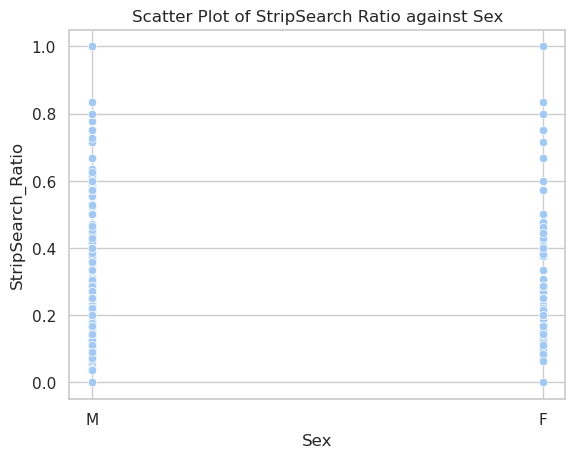

In [53]:
# create a scatter plot about the ratio of strip search against sex
sns.scatterplot(data=df, x='Sex', y='StripSearch_Ratio')
plt.title('Scatter Plot of StripSearch Ratio against Sex')
plt.show()

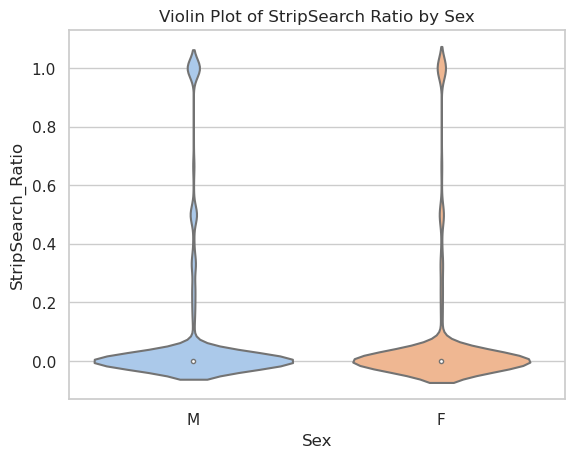

In [54]:
# create a violin plot about the ratio of strip search by sex
sns.violinplot(data=df, x='Sex', y='StripSearch_Ratio')
plt.title('Violin Plot of StripSearch Ratio by Sex')
plt.show()

Plots for Youth

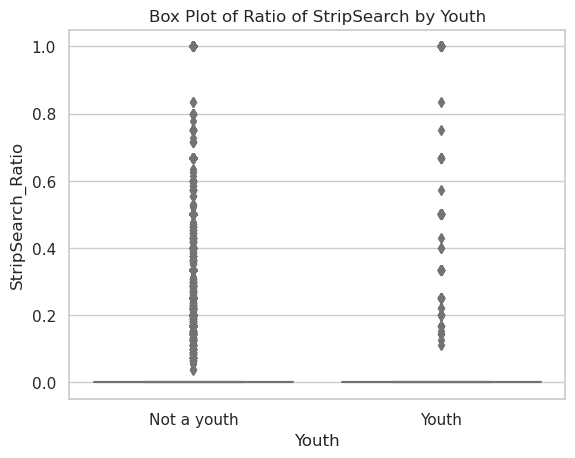

In [55]:
# create a boxplot about the ratio of strip search and arrest by youth
sns.boxplot(x='Youth', y='StripSearch_Ratio', data=df)
plt.title('Box Plot of Ratio of StripSearch by Youth')
plt.show()

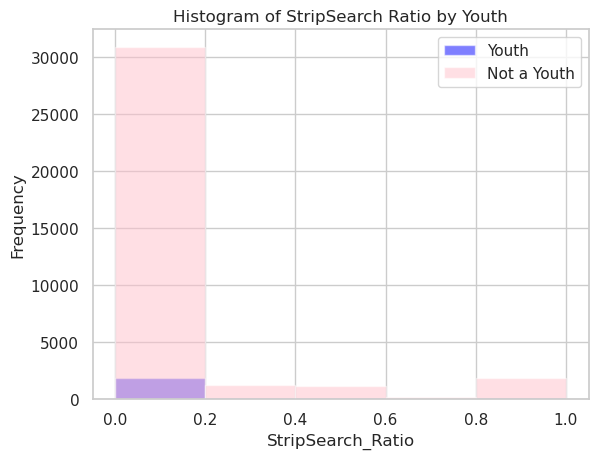

In [56]:
# create a histogram about the ratio of strip search by youth
df_youth = df[df['Youth']=='Youth']
df_not_youth = df[df['Youth']=='Not a youth']

plt.hist(df_youth['StripSearch_Ratio'], alpha=0.5, bins=5, color='Blue')
plt.hist(df_not_youth['StripSearch_Ratio'], alpha=0.5, bins=5, color='Pink')
plt.xlabel('StripSearch_Ratio')
plt.ylabel('Frequency')
plt.legend(['Youth','Not a Youth'])
plt.title('Histogram of StripSearch Ratio by Youth')
plt.show()

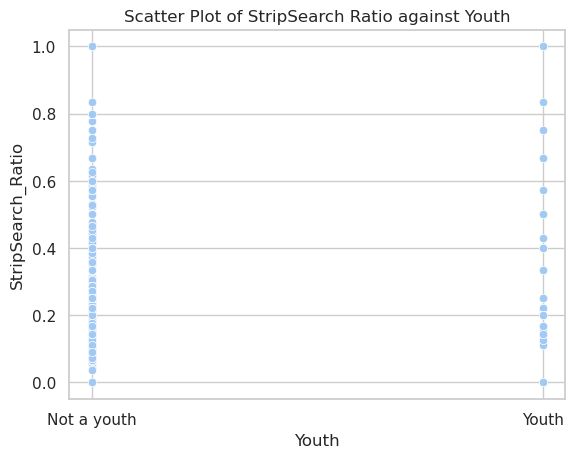

In [57]:
# create a scatter plot about the ratio of strip search and arrest against youth
sns.scatterplot(data=df, x='Youth', y='StripSearch_Ratio')
plt.title('Scatter Plot of StripSearch Ratio against Youth')
plt.show()

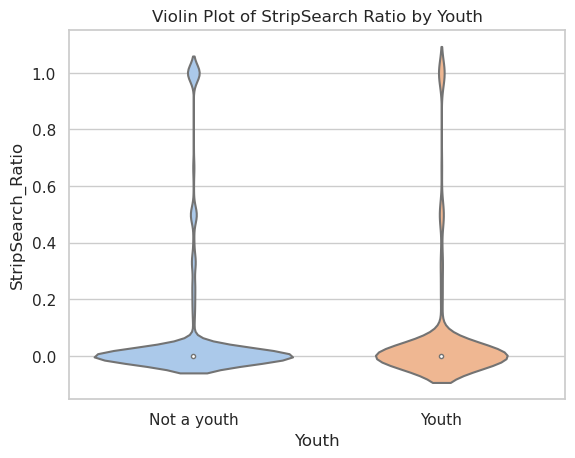

In [58]:
# create a violin plot about the ratio of strip search by youth
sns.violinplot(data=df, x='Youth', y='StripSearch_Ratio')
plt.title('Violin Plot of StripSearch Ratio by Youth')
plt.show()

Violin Plot-Strip Search Probabilities by Youth and Sex

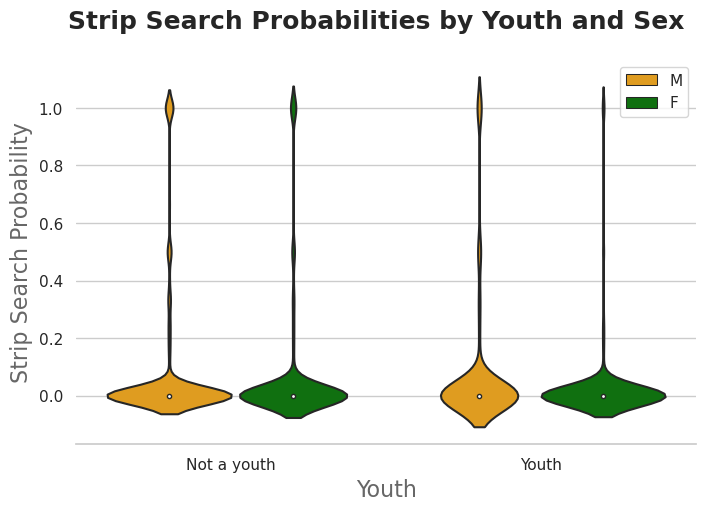

In [59]:
#Violin plot of strip search ratio
#Reference: https://app.mode.com/modeanalytics/reports/8f48bee3ee4e/details/notebook
sns.set(style="whitegrid", palette="pastel", color_codes=True)

f, ax = plt.subplots(figsize=(8, 5))

sns.violinplot(x="Youth", y="StripSearch_Ratio", hue="Sex", data=df,
               palette={"M": "Orange", "F": "Green"})
sns.despine(left=True)

f.suptitle('Strip Search Probabilities by Youth and Sex', fontsize=18, fontweight='bold')
ax.set_xlabel("Youth",size = 16,alpha=0.7)
ax.set_ylabel("Strip Search Probability",size = 16,alpha=0.7)
plt.legend(loc='upper right')

Assumption check

In [60]:
#conduct formal statistics test "Shapiro–Wilk test" to check the normality of the dependent variables
#H0: the Strip Search Ratios are normally distributed
#Ha: the Strip Search Ratios are not normally distributed
Female_Ratio = df_female['StripSearch_Ratio']
Male_Ratio = df_male['StripSearch_Ratio']
Youth_Ratio = df_youth['StripSearch_Ratio']
Not_Youth_Ratio = df_not_youth['StripSearch_Ratio']

print('Shapiro Result for Male:',(shapiro(Male_Ratio)),
      'Shapiro Result for Female:',(shapiro(Female_Ratio)),
      'Shapiro Result for Youth when arrested:',(shapiro(Youth_Ratio)),
      'Shapiro Result for Not a Youth when arrested:',(shapiro(Not_Youth_Ratio)))

Shapiro Result for Male: ShapiroResult(statistic=0.3896251916885376, pvalue=0.0) Shapiro Result for Female: ShapiroResult(statistic=0.32876527309417725, pvalue=0.0) Shapiro Result for Youth when arrested: ShapiroResult(statistic=0.3272421956062317, pvalue=0.0) Shapiro Result for Not a Youth when arrested: ShapiroResult(statistic=0.3806148171424866, pvalue=0.0)


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [61]:
#Conduct the Levene's test to check if the variance are the same between male's and female's Strip Search Ratio
#H0:the variance between the two groups are equal
#H1:the variance between the two groups are not equal
stats.levene(Male_Ratio, Female_Ratio, center='mean')

LeveneResult(statistic=136.15141065152915, pvalue=2.0963969391664436e-31)

In [62]:
#Conduct the Levene's test to check if the variance are the same between youth's and not a youth's strip search ratio
#H0:the variance between the two groups are equal
#H1:the variance between the two groups are not equal
stats.levene(Youth_Ratio, Not_Youth_Ratio, center='mean')

LeveneResult(statistic=39.60714096189019, pvalue=3.139883335944223e-10)

T-Test for Sex

In [63]:
# conduct t-test of Sex
# H0: the true difference between the means of female and male is zero.(μ1 = μ2)
# H1: the true difference between the means of female and male is different from zero.(μ1 ≠ μ2)
# check assumption if it is equality of variance
print("Variance of Sex is",Female_Ratio.var(), Male_Ratio.var())
# check assumption if it is normal distribution: From the histogram above about sex shows 
# that they are not normal distribution.
# check assumption if it is independent of each other: We treat each arrest as independent, 
# so each one is independent of the others.

Variance of Sex is 0.0481776470284832 0.05975165069904626


In [64]:
# display the t-test result
print('Ttest results for sex:',stats.ttest_ind(Female_Ratio, Male_Ratio, equal_var=False))

Ttest results for sex: Ttest_indResult(statistic=-6.757202536741676, pvalue=1.466625263402108e-11)


In [65]:
#calculate mean and standard deviation for groups of sex 
print('Mean Grades for Sex, female, male:',Female_Ratio.mean(), Male_Ratio.mean())
print('Standard deviation for Sex, female, male:',Female_Ratio.std(), Male_Ratio.std())

Mean Grades for Sex, female, male: 0.06587293569889788 0.08533571418796715
Standard deviation for Sex, female, male: 0.2194940705998301 0.24444150772535803


In [66]:
# compute confidence interval 
cm_Sex = sms.CompareMeans(sms.DescrStatsW(Male_Ratio), sms.DescrStatsW(Female_Ratio))
print('Confidence interval for Sex:',cm_Sex.tconfint_diff(usevar='unequal'))

Confidence interval for Sex: (0.013816967504646019, 0.02510858947349255)


In [67]:
#compute welch dof for Sex
print('DOF for Sex:',welch_dof(Female_Ratio, Male_Ratio))

DOF for Sex: 13031.22344170968


T-test for youth

In [68]:
# conduct t-test of Youth
# H0: the true difference between the means of youth and not youth is zero.(μ1 = μ2)
# H1: the true difference between the means of youth and not youth is different from zero.(μ1 ≠ μ2)
# check assumption if it is equality of variance
print("Variance of Youth is",Youth_Ratio.var(), Not_Youth_Ratio.var())
# check assumption if it is normal distribution: From the histogram above about youth shows 
# that they are not normal distribution.
# check assumption if it is independent of each other: We treat each arrest as independent, 
# so each one is independent of the others.

Variance of Youth is 0.046036287457952095 0.05808898326837345


In [69]:
# display the t-test result
print('Ttest results for Youth:',stats.ttest_ind(Youth_Ratio, Not_Youth_Ratio, equal_var=False))

Ttest results for Youth: Ttest_indResult(statistic=-3.7655634998417558, pvalue=0.00017016731012575135)


In [70]:
#calculate mean and standard deviation for groups of youth 
print('Mean Grades for Youth, youth, not youth:',Youth_Ratio.mean(), Not_Youth_Ratio.mean())
print('Standard deviation for Youth, youth, not youth:',Youth_Ratio.std(), Not_Youth_Ratio.std())

Mean Grades for Youth, youth, not youth: 0.06399662170094862 0.08235965453188808
Standard deviation for Youth, youth, not youth: 0.2145606847909283 0.2410165622283528


In [71]:
# compute confidence interval 
cm_Youth = sms.CompareMeans(sms.DescrStatsW(Not_Youth_Ratio), sms.DescrStatsW(Youth_Ratio))
print('Confidence interval for Youth:',cm_Youth.tconfint_diff(usevar='unequal'))

Confidence interval for Youth: (0.008800307974183968, 0.027925757687694917)


In [72]:
#compute welch dof for Youth
print('DOF for Youth:',welch_dof(Youth_Ratio, Not_Youth_Ratio))

DOF for Youth: 2399.3648276271633


ANOVA Test

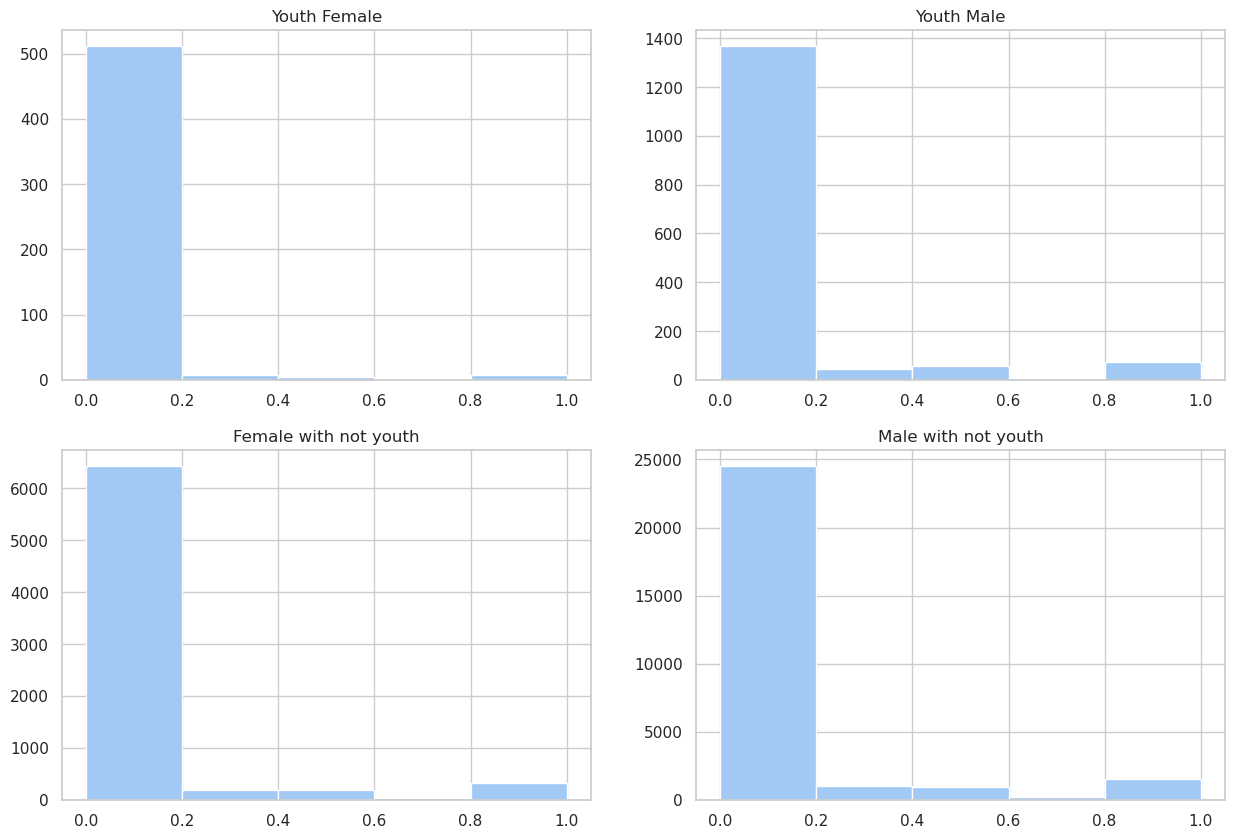

In [73]:
# check assumptions if the varaibles are normal distribution.
female_youth = df[(df['Sex'] == 'F') & (df['Youth'] == 'Youth')]
male_youth = df[(df['Sex'] == 'M') & (df['Youth'] == 'Youth')]
female_not_youth = df[(df['Sex'] == 'F') & (df['Youth'] == 'Not a youth')]
male_not_youth = df[(df['Sex'] == 'M') & (df['Youth'] == 'Not a youth')]


fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0,0].hist(female_youth['StripSearch_Ratio'], bins=5)
axs[0,0].set_title('Youth Female')
axs[0,1].hist(male_youth['StripSearch_Ratio'], bins=5)
axs[0,1].set_title('Youth Male')
axs[1,0].hist(female_not_youth['StripSearch_Ratio'], bins=5)
axs[1,0].set_title('Female with not youth')
axs[1,1].hist(male_not_youth['StripSearch_Ratio'], bins=5)
axs[1,1].set_title('Male with not youth')
plt.show()

In [74]:
# check assumptions if the variances is homogenous.
# Reference: https://www.reneshbedre.com/blog/anova.html
# H0:the variance between the groups are equal
# H1:the variance between the groups are not equal
res = stat()
res.levene(df=df, res_var='StripSearch_Ratio', xfac_var=['Sex', 'Youth'])
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.8338
1,Degrees of freedom (Df),3.0000
2,p value,0.4751


In [75]:
# check assumption if it is independent of each other: We treat each arrest as independent, 
# so each one is independent of the others.
# check assumption if is equal sample sizes: the sample sizes for each combination of the two factors is equal.

In [76]:
model = ols('StripSearch_Ratio ~ Sex + Youth + Sex:Youth', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Sex,2.236930,1.0,39.007551,4.267117e-10
Youth,0.590849,1.0,10.303223,1.329104e-03
Sex:Youth,0.548754,1.0,9.569161,1.980193e-03
Residual,2140.269973,37322.0,NaN,NaN


Tukey's HSD Test

In [77]:
# perform a Tukey's HSD for two-way ANOVA
# Reference:https://towardsdatascience.com/anova-tukey-test-in-python-b3082b6e6bda

df['group'] = df.Sex + " / " + df.Youth

# perform multiple pairwise comparison (Tukey HSD)
tukey_result = pairwise_tukeyhsd(endog=df['StripSearch_Ratio'], groups=df['group'], alpha=0.05)

print(tukey_result)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
F / Not a youth       F / Youth  -0.0462 0.0001 -0.0738 -0.0185   True
F / Not a youth M / Not a youth   0.0167    0.0  0.0085  0.0248   True
F / Not a youth       M / Youth    0.009 0.5353 -0.0082  0.0263  False
      F / Youth M / Not a youth   0.0628    0.0  0.0359  0.0898   True
      F / Youth       M / Youth   0.0552    0.0  0.0243  0.0861   True
M / Not a youth       M / Youth  -0.0076 0.6116 -0.0237  0.0084  False
----------------------------------------------------------------------


Interaction Plot

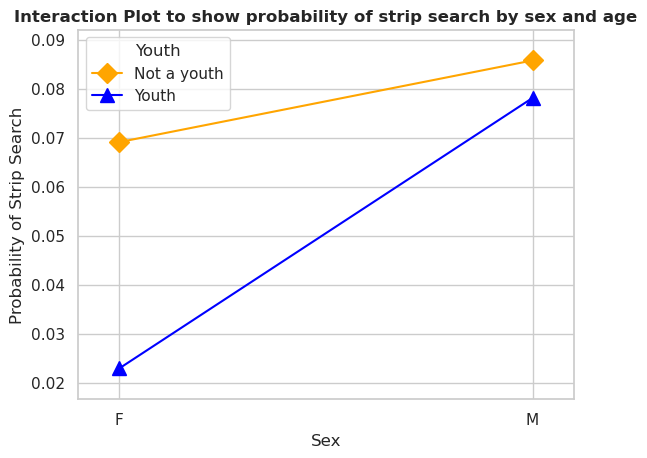

In [78]:
#plot an interaction plot 
YOUTH = df['Youth'].astype("category")
Ratio = df['StripSearch_Ratio'].values

interaction_p = interaction_plot(df['Sex'], YOUTH, Ratio, colors=['orange','blue'], markers=['D','^'], ms=10)
plt.ylabel('Probability of Strip Search')
plt.xlabel('Sex')
plt.title('Interaction Plot to show probability of strip search by sex and age', fontweight='bold')
plt.show()

In [79]:
df.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,...,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Number_Arrests,Number_StripSearches,StripSearch_Ratio
count,37326.000000,3.732600e+04,3.732600e+04,37326.000000,37326.000000,37326.000000,37326.000000,37326.000000,37326.000000,37326.000000,...,37326.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,37326.000000,37326.000000,37326.000000,37326.000000
mean,2020.439426,1.029988e+06,6.032340e+06,318673.004126,0.102315,0.471307,0.004099,0.035069,0.032176,0.020790,...,0.470021,0.773501,0.363708,0.480492,0.459544,0.384656,35112.212747,1.736002,0.196431,0.081336
std,0.496324,1.732770e+04,1.872182e+04,10780.831489,0.303066,0.499183,0.063893,0.183958,0.176470,0.142682,...,0.499107,0.418621,0.481129,0.499685,0.498426,0.486578,19217.998312,2.012477,0.644826,0.239654
min,2020.000000,1.000000e+06,6.000001e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2020.000000,1.014874e+06,6.016128e+06,309336.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19103.500000,1.000000,0.000000,0.000000
50%,2020.000000,1.030052e+06,6.032268e+06,318674.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35506.500000,1.000000,0.000000,0.000000
75%,2021.000000,1.045050e+06,6.048582e+06,328007.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52853.750000,2.000000,0.000000,0.000000
max,2021.000000,1.060002e+06,6.064802e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000,54.000000,17.000000,1.000000


In [80]:
youth_df.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,...,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Number_Arrests,Number_StripSearches,StripSearch_Ratio
count,2080.000000,2.080000e+03,2.080000e+03,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,...,2080.000000,164.000000,164.000000,164.000000,164.000000,164.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,2020.397596,1.030327e+06,6.031835e+06,318704.290865,0.078846,0.330288,0.009135,0.015865,0.027885,0.002885,...,0.475481,0.780488,0.408537,0.652439,0.512195,0.402439,48811.774038,1.539423,0.131731,0.063997
std,0.489519,1.754729e+04,1.899159e+04,10791.607023,0.269563,0.470430,0.095161,0.124985,0.164682,0.053644,...,0.499519,0.415184,0.493069,0.477654,0.501382,0.491891,11302.479267,1.321151,0.442948,0.214561
min,2020.000000,1.000028e+06,6.000044e+06,300001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20826.000000,1.000000,0.000000,0.000000
25%,2020.000000,1.014130e+06,6.015168e+06,309260.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40928.000000,1.000000,0.000000,0.000000
50%,2020.000000,1.030708e+06,6.031656e+06,318771.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,50805.000000,1.000000,0.000000,0.000000
75%,2021.000000,1.045580e+06,6.047902e+06,328226.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,57747.250000,2.000000,0.000000,0.000000
max,2021.000000,1.059910e+06,6.064676e+06,337342.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65275.000000,21.000000,5.000000,1.000000


In [81]:
not_youth_df.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,...,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Number_Arrests,Number_StripSearches,StripSearch_Ratio
count,35246.000000,3.524600e+04,3.524600e+04,35246.000000,35246.000000,35246.000000,35246.000000,35246.000000,35246.000000,35246.000000,...,35246.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,35246.000000,35246.000000,35246.000000,35246.000000
mean,2020.441894,1.029968e+06,6.032369e+06,318671.157777,0.103700,0.479629,0.003802,0.036203,0.032429,0.021846,...,0.469699,0.773187,0.361696,0.472777,0.457182,0.383858,34303.749730,1.747603,0.200250,0.082360
std,0.496619,1.731470e+04,1.870563e+04,10780.345646,0.304875,0.499592,0.061543,0.186797,0.177140,0.146184,...,0.499088,0.418828,0.480557,0.499327,0.498231,0.486390,19283.745106,2.045411,0.654602,0.241017
min,2020.000000,1.000000e+06,6.000001e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2020.000000,1.014892e+06,6.016177e+06,309343.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18181.500000,1.000000,0.000000,0.000000
50%,2020.000000,1.030000e+06,6.032314e+06,318668.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,34011.500000,1.000000,0.000000,0.000000
75%,2021.000000,1.044992e+06,6.048622e+06,327985.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52017.750000,2.000000,0.000000,0.000000
max,2021.000000,1.060002e+06,6.064802e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000,54.000000,17.000000,1.000000


In [82]:
male_df.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,...,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Number_Arrests,Number_StripSearches,StripSearch_Ratio
count,29656.000000,2.965600e+04,2.965600e+04,29656.000000,29656.000000,29656.000000,29656.000000,29656.000000,29656.000000,29656.000000,...,29656.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,29656.000000,29656.000000,29656.000000,29656.000000
mean,2020.438023,1.030026e+06,6.032324e+06,318640.327725,0.107297,0.497033,0.004755,0.034799,0.033046,0.018984,...,0.474541,0.769013,0.366122,0.495915,0.463231,0.382150,34366.746021,1.762679,0.206569,0.085336
std,0.496152,1.732394e+04,1.874866e+04,10786.598480,0.309496,0.500000,0.068790,0.183274,0.178759,0.136472,...,0.499360,0.421530,0.481819,0.500062,0.498725,0.485989,19334.790760,2.040227,0.661451,0.244442
min,2020.000000,1.000000e+06,6.000001e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2020.000000,1.014917e+06,6.016074e+06,309265.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17966.750000,1.000000,0.000000,0.000000
50%,2020.000000,1.030116e+06,6.032194e+06,318617.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,34294.500000,1.000000,0.000000,0.000000
75%,2021.000000,1.045054e+06,6.048631e+06,327978.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52133.000000,2.000000,0.000000,0.000000
max,2021.000000,1.060002e+06,6.064802e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000,54.000000,17.000000,1.000000


In [83]:
female_df.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,...,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Number_Arrests,Number_StripSearches,StripSearch_Ratio
count,7670.000000,7.670000e+03,7.670000e+03,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,...,7670.000000,637.000000,637.000000,637.000000,637.000000,637.000000,7670.000000,7670.000000,7670.000000,7670.000000
mean,2020.444850,1.029837e+06,6.032400e+06,318799.347197,0.083051,0.371838,0.001565,0.036115,0.028814,0.027771,...,0.452542,0.795918,0.351648,0.403454,0.441130,0.397174,37994.554498,1.632855,0.157236,0.065873
std,0.496982,1.734252e+04,1.861878e+04,10758.272704,0.275977,0.483327,0.039526,0.186588,0.167293,0.164325,...,0.497775,0.403346,0.477860,0.490976,0.496912,0.489697,18480.000777,1.897975,0.574411,0.219494
min,2020.000000,1.000003e+06,6.000005e+06,300001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000
25%,2020.000000,1.014655e+06,6.016226e+06,309627.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,24513.250000,1.000000,0.000000,0.000000
50%,2020.000000,1.029791e+06,6.032598e+06,318938.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39524.500000,1.000000,0.000000,0.000000
75%,2021.000000,1.045004e+06,6.048319e+06,328090.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54575.750000,1.000000,0.000000,0.000000
max,2021.000000,1.060002e+06,6.064801e+06,337335.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65274.000000,32.000000,11.000000,1.000000
